In [59]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import numpy as np
from ast import literal_eval
import matplotlib.pylab as plt

In [20]:
df_co = pd.read_csv('2019-2020_Co-Location_Reporting.csv')
df_loc = pd.read_csv('2019_-_2020_School_Locations.csv')

In [3]:
df_loc.head()

,fiscal_year,system_code,location_code,location_name,BEDS,Managed_by_name,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,...,Administrative_District_Name,community_school_sup_name,Tier_3_Support_Location_Name,Tier_3_Support_Leader_Name,Tier_2_Support_Location_Name,HighSchool_Network_Location_Code,HighSchool_Network_Name,HighSchool_Network_Superintendent,Community_district 1,Police_precinct
0,2020,15K001,K001,P.S. 001 The Bergen,331500010001,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 15,"SKOP, ANITA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 5- Brooklyn North,NaN,NaN,NaN,307.0,72.0
1,2020,17K002,K002,Parkside Preparatory Academy,331700010002,DOE,General Academic,Junior High-Intermediate-Middle,"06,07,08,SE","06,07,08",...,COMMUNITY SCHOOL DISTRICT 17,"ELLIS, CLARENCE",NYCDOE Borough Office - Brooklyn South,Mauriciere de Govia,School Support Team 2- Brooklyn South,NaN,NaN,NaN,309.0,71.0
2,2020,13K003,K003,P.S. 003 The Bedford Village,331300010003,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 13,"SAMUELS, KAMAR",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 3- Brooklyn North,NaN,NaN,NaN,303.0,79.0
3,2020,75K004,K004,P.S. K004,307500013004,DOE,Special Education,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05,06,07,SE",...,CITYWIDE SPECIAL EDUCATION,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 752,NaN,NaN,NaN,305.0,75.0
4,2020,16K005,K005,P.S. 005 Dr. Ronald McNair,331600010005,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 16,"MARTIN, YOLANDA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 4- Brooklyn North,NaN,NaN,NaN,303.0,81.0


In [4]:
#standardize
df_co.columns = [c.lower().replace(' ', '_') for c in df_co.columns]
df_co = df_co.rename(columns={"building_id(s)": "building_id"})

In [5]:
df_co

,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,2018-19_ela_#_tested,2018-19_ela_#_proficient_(l3&4),2018-19_ela_%_proficient_(l3&4),2018-19_math_#_tested,2018-19_math_#_proficient_(l3&4),2018-19_math_%_proficient_(l3&4),2018-19_total_4-year_august_grad_cohort,2018-19_%_4-year_august_graduates,2018-19_total_6-year_grad_cohort,2018-19_%_6-year_graduates
0,01M015,1,P.S. 015 Roberto Clemente,False,M015,False,190,190,0,0,...,70,42,60.0%,70,46,65.7%,NaN,NaN,NaN,NaN
1,01M063,1,The STAR Academy - P.S.63,False,M063,False,229,229,0,0,...,79,35,44.3%,78,25,32.1%,NaN,NaN,NaN,NaN
2,01M064,1,P.S. 064 Robert Simon,False,M064,False,236,236,0,0,...,81,40,49.4%,81,35,43.2%,NaN,NaN,NaN,NaN
3,01M142,1,P.S. 142 Amalia Castro,False,M142,False,329,329,0,0,...,104,44,42.3%,98,37,37.8%,NaN,NaN,NaN,NaN
4,01M188,1,P.S. 188 The Island School,False,M188,False,398,238,160,0,...,269,67,24.9%,219,69,31.5%,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,84X616,84,KIPP Elements Primary Charter School,False,X859,False,181,181,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,84X617,84,KIPP All Charter School,False,X859,False,179,89,90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,84X623,84,Neighborhood Charter School: Bronx,False,XBPP,False,107,107,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,84X704,84,KIPP Academy Charter School,True,"X151, X790, XAVN",False,1088,566,255,267,...,511,319,62.4%,512,398,77.7%,63,95.2%,77,98.7%


In [6]:
#see if org is split sited
df_co['is_org_split-sited'] = df_co['is_org_split-sited'].astype('str') 

In [7]:
def split_site(row):  
    if ('True') in row['is_org_split-sited']:
        return 'True'
    return 'False'
df_co['is_split'] = df_co.apply (lambda row: split_site(row), axis=1)

In [6]:
df_co[df_co['is_split'] == 'True']

,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,2018-19_ela_#_proficient_(l3&4),2018-19_ela_%_proficient_(l3&4),2018-19_math_#_tested,2018-19_math_#_proficient_(l3&4),2018-19_math_%_proficient_(l3&4),2019-20_total_4-year_august_grad_cohort,2019-20_%_4-year_august_graduates,2019-20_total_6-year_grad_cohort,2019-20_%_6-year_graduates,is_split
57,02M391,2,District 2 Pre-K Center,True,"M343, M391, M444, M453, M471, M474, M491, M860",False,527,527,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
129,03M859,3,Special Music School,True,"M490, M932",False,298,78,41,179,...,79,97.5%,68,67,98.5%,47,100.0%,45,100.0%,True
144,04M310,4,The Judith S. Kaye School,True,"M646, Q142",True,160,0,0,160,...,NaN,NaN,NaN,NaN,NaN,78,47.4%,19,89.5%,True
238,08X119,8,The Dr. Emmett W. Bassett School,True,"X119, X125",False,632,632,0,0,...,159,42.2%,384,174,45.3%,NaN,NaN,NaN,NaN,True
320,09X582,9,Garden of Learning and Discovery Pre-K Center,True,"X073, X582",False,73,73,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,84X494,84,Success Academy Charter School - Bronx 2,True,"X022, X055",False,1004,769,235,0,...,417,90.5%,409,406,99.3%,NaN,NaN,NaN,NaN,True
1099,84X579,84,Bronx Charter School for Excellence II,True,"XACO, XADW",False,362,362,0,0,...,54,91.5%,59,56,94.9%,NaN,NaN,NaN,NaN,True
1105,84X598,84,KIPP Freedom Charter School,True,"XBVH, X044",False,457,264,193,0,...,29,31.2%,93,58,62.4%,NaN,NaN,NaN,NaN,True
1119,84X704,84,KIPP Academy Charter School,True,"X151, X790, XAVN",False,1118,571,267,280,...,319,62.4%,512,398,77.7%,56,92.9%,75,96.0%,True


In [8]:
# explode building id column
df_coExplode = df_co.copy()
df_coExplode['building_id']= df_coExplode['building_id'].str.split(",")
df_coExplode = df_coExplode.explode("building_id")


In [9]:
#reset index
df_coExplode = df_coExplode.reset_index(drop=True)

In [10]:
#delete some columns
df_coExplode = df_coExplode.drop(columns=['is_org_split-sited'])
df_coExplode

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,2018-19_ela_#_proficient_(l3&4),2018-19_ela_%_proficient_(l3&4),2018-19_math_#_tested,2018-19_math_#_proficient_(l3&4),2018-19_math_%_proficient_(l3&4),2018-19_total_4-year_august_grad_cohort,2018-19_%_4-year_august_graduates,2018-19_total_6-year_grad_cohort,2018-19_%_6-year_graduates,is_split
0,01M015,1,P.S. 015 Roberto Clemente,M015,False,190,190,0,0,0.142,...,42,60.0%,70,46,65.7%,NaN,NaN,NaN,NaN,False
1,01M063,1,The STAR Academy - P.S.63,M063,False,229,229,0,0,0.039,...,35,44.3%,78,25,32.1%,NaN,NaN,NaN,NaN,False
2,01M064,1,P.S. 064 Robert Simon,M064,False,236,236,0,0,0.030,...,40,49.4%,81,35,43.2%,NaN,NaN,NaN,NaN,False
3,01M142,1,P.S. 142 Amalia Castro,M142,False,329,329,0,0,0.012,...,44,42.3%,98,37,37.8%,NaN,NaN,NaN,NaN,False
4,01M188,1,P.S. 188 The Island School,M188,False,398,238,160,0,0.028,...,67,24.9%,219,69,31.5%,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,84X704,84,KIPP Academy Charter School,X151,False,1088,566,255,267,0.003,...,319,62.4%,512,398,77.7%,63,95.2%,77,98.7%,True
1504,84X704,84,KIPP Academy Charter School,X790,False,1088,566,255,267,0.003,...,319,62.4%,512,398,77.7%,63,95.2%,77,98.7%,True
1505,84X704,84,KIPP Academy Charter School,XAVN,False,1088,566,255,267,0.003,...,319,62.4%,512,398,77.7%,63,95.2%,77,98.7%,True
1506,84X730,84,Bronx Charter School for the Arts,X972,False,523,310,213,0,0.002,...,94,35.3%,261,113,43.3%,NaN,NaN,NaN,NaN,True


In [16]:
df_coExplode.building_id.value_counts()

X475     7
M460     6
X425     6
X410     6
M440     6
        ..
 K178    1
 K555    1
 K660    1
 K902    1
 XAFM    1
Name: building_id, Length: 1004, dtype: int64

In [21]:
df_coExplode[df_coExplode['building_id'] == 'K902']

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,2018-19_ela_#_proficient_(l3&4),2018-19_ela_%_proficient_(l3&4),2018-19_math_#_tested,2018-19_math_#_proficient_(l3&4),2018-19_math_%_proficient_(l3&4),2019-20_total_4-year_august_grad_cohort,2019-20_%_4-year_august_graduates,2019-20_total_6-year_grad_cohort,2019-20_%_6-year_graduates,is_split
464,13K266,13,M.S. K266 - Park Place Community Middle School,K902,False,148,0,148,0,0.0,...,38,33.6%,116,32,27.6%,NaN,NaN,NaN,NaN,False


In [11]:
df_loc.Location_Category_Description.value_counts()

Elementary                         798
High school                        552
Junior High-Intermediate-Middle    394
K-8                                233
Secondary School                   118
K-12 all grades                     71
Early Childhood                     18
Ungraded                             5
Collaborative or Multi-graded        1
Name: Location_Category_Description, dtype: int64

In [12]:
#get specific columns for join
df_join = df_loc[['system_code','location_code','location_name','Geographical_District_code','Managed_by_name','Location_Category_Description','Grades_text','LONGITUDE','LATITUDE','Principal_Name','open_date']]
df_join

,system_code,location_code,location_name,Geographical_District_code,Managed_by_name,Location_Category_Description,Grades_text,LONGITUDE,LATITUDE,Principal_Name,open_date
0,15K001,K001,P.S. 001 The Bergen,15,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-74.011420,40.648959,Arlene Ramos,1965-07-01T00:00:00.000
1,17K002,K002,Parkside Preparatory Academy,17,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.951575,40.656423,ADRIENNE SPENCER,1994-07-01T00:00:00.000
2,13K003,K003,P.S. 003 The Bedford Village,13,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.955219,40.682311,KRISTINA BEECHER,1950-07-01T00:00:00.000
3,75K004,K004,P.S. K004,19,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.879276,40.658500,Rebecca Schropfer,1999-07-01T00:00:00.000
4,16K005,K005,P.S. 005 Dr. Ronald McNair,16,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.921970,40.685241,LENA GATES,1966-07-01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...
2185,84X729,X729,Readnet Bronx Charter School,7,Charter,Elementary,"01,02",-73.917000,40.814900,NaN,2003-07-01T00:00:00.000
2186,84X730,X730,Bronx Charter School for the Arts,8,Charter,Elementary,"0K,01,02,03,04,05,06,07",-73.886477,40.821815,Jonea Thomas,2003-07-01T00:00:00.000
2187,75X754,X754,J. M. Rapport School Career Development,7,DOE,High school,"09,10,11,12,SE",-73.909363,40.811051,DANIEL HOEHN,1999-07-01T00:00:00.000
2188,75X811,X811,P.S. X811,12,DOE,Secondary School,"08,09,10,11,12,SE",-73.886798,40.830552,ROSA NIEVES GREENE,1994-10-24T00:00:00.000


In [13]:
df_join = df_join.drop_duplicates()
df_join

,system_code,location_code,location_name,Geographical_District_code,Managed_by_name,Location_Category_Description,Grades_text,LONGITUDE,LATITUDE,Principal_Name,open_date
0,15K001,K001,P.S. 001 The Bergen,15,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-74.011420,40.648959,Arlene Ramos,1965-07-01T00:00:00.000
1,17K002,K002,Parkside Preparatory Academy,17,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.951575,40.656423,ADRIENNE SPENCER,1994-07-01T00:00:00.000
2,13K003,K003,P.S. 003 The Bedford Village,13,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.955219,40.682311,KRISTINA BEECHER,1950-07-01T00:00:00.000
3,75K004,K004,P.S. K004,19,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.879276,40.658500,Rebecca Schropfer,1999-07-01T00:00:00.000
4,16K005,K005,P.S. 005 Dr. Ronald McNair,16,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.921970,40.685241,LENA GATES,1966-07-01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...
2184,75X723,X723,P.S. 723,11,DOE,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",-73.831856,40.882980,SHANTE CHUNN,2005-07-08T00:00:00.000
2185,84X729,X729,Readnet Bronx Charter School,7,Charter,Elementary,"01,02",-73.917000,40.814900,NaN,2003-07-01T00:00:00.000
2186,84X730,X730,Bronx Charter School for the Arts,8,Charter,Elementary,"0K,01,02,03,04,05,06,07",-73.886477,40.821815,Jonea Thomas,2003-07-01T00:00:00.000
2187,75X754,X754,J. M. Rapport School Career Development,7,DOE,High school,"09,10,11,12,SE",-73.909363,40.811051,DANIEL HOEHN,1999-07-01T00:00:00.000


In [14]:
df_join = df_join.rename(columns={"system_code": "dbn"})

In [30]:
df_coExplode['dbn'].isin(df_join['dbn']).value_counts()

True     1496
False     109
Name: dbn, dtype: int64

In [15]:
df_coDetails = df_coExplode.merge(df_join, on='dbn', how='left')
df_coDetails

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,location_code,location_name,Geographical_District_code,Managed_by_name,Location_Category_Description,Grades_text,LONGITUDE,LATITUDE,Principal_Name,open_date
0,01M015,1,P.S. 015 Roberto Clemente,M015,False,190,190,0,0,0.142,...,M015,P.S. 015 Roberto Clemente,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01T00:00:00.000
1,01M063,1,The STAR Academy - P.S.63,M063,False,229,229,0,0,0.039,...,M063,The STAR Academy - P.S.63,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01T00:00:00.000
2,01M064,1,P.S. 064 Robert Simon,M064,False,236,236,0,0,0.030,...,M064,P.S. 064 Robert Simon,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01T00:00:00.000
3,01M142,1,P.S. 142 Amalia Castro,M142,False,329,329,0,0,0.012,...,M142,P.S. 142 Amalia Castro,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01T00:00:00.000
4,01M188,1,P.S. 188 The Island School,M188,False,398,238,160,0,0.028,...,M188,P.S. 188 The Island School,1.0,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,84X704,84,KIPP Academy Charter School,X151,False,1088,566,255,267,0.003,...,X704,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000
1504,84X704,84,KIPP Academy Charter School,X790,False,1088,566,255,267,0.003,...,X704,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000
1505,84X704,84,KIPP Academy Charter School,XAVN,False,1088,566,255,267,0.003,...,X704,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000
1506,84X730,84,Bronx Charter School for the Arts,X972,False,523,310,213,0,0.002,...,X730,Bronx Charter School for the Arts,8.0,Charter,Elementary,"0K,01,02,03,04,05,06,07",-73.886477,40.821815,Jonea Thomas,2003-07-01T00:00:00.000


In [16]:
#standardize
df_coDetails.columns = [c.lower().replace(' ', '_') for c in df_coDetails.columns]

In [17]:
# join for df_co before explode
df_coJoin = df_co.merge(df_join, on='dbn', how='left')
df_coJoin

,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,...,location_code,location_name,Geographical_District_code,Managed_by_name,Location_Category_Description,Grades_text,LONGITUDE,LATITUDE,Principal_Name,open_date
0,01M015,1,P.S. 015 Roberto Clemente,False,M015,False,190,190,0,0,...,M015,P.S. 015 Roberto Clemente,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01T00:00:00.000
1,01M063,1,The STAR Academy - P.S.63,False,M063,False,229,229,0,0,...,M063,The STAR Academy - P.S.63,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01T00:00:00.000
2,01M064,1,P.S. 064 Robert Simon,False,M064,False,236,236,0,0,...,M064,P.S. 064 Robert Simon,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01T00:00:00.000
3,01M142,1,P.S. 142 Amalia Castro,False,M142,False,329,329,0,0,...,M142,P.S. 142 Amalia Castro,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01T00:00:00.000
4,01M188,1,P.S. 188 The Island School,False,M188,False,398,238,160,0,...,M188,P.S. 188 The Island School,1.0,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01T00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,84X616,84,KIPP Elements Primary Charter School,False,X859,False,181,181,0,0,...,X616,KIPP Elements Primary Charter School,10.0,Charter,Elementary,"0K,01",-73.903764,40.857932,Sarah English/Diamond Graham,2019-07-01T00:00:00.000
1075,84X617,84,KIPP All Charter School,False,X859,False,179,89,90,0,...,X617,KIPP All Charter School,10.0,Charter,K-8,"05,06",-73.903764,40.857932,Kate Baughman,2019-07-01T00:00:00.000
1076,84X623,84,Neighborhood Charter School: Bronx,False,XBPP,False,107,107,0,0,...,X623,Neighborhood Charter School: Bronx,7.0,Charter,Elementary,"0K,01",-73.909019,40.808963,NaN,2019-07-01T00:00:00.000
1077,84X704,84,KIPP Academy Charter School,True,"X151, X790, XAVN",False,1088,566,255,267,...,X704,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000


In [18]:
#standardize
df_coJoin.columns = [c.lower().replace(' ', '_') for c in df_coJoin.columns]

In [44]:
list(df_coDetails.columns)

['dbn',
 'district',
 'school_name',
 'building_id',
 'transfer_school',
 'total_enrollment',
 'grades_3k-5_enrollment',
 'grades_6-8_enrollment',
 'grades_9-12_enrollment',
 '%_asian',
 '%_black',
 '%_hispanic',
 '%_multiracial',
 '%_native_american',
 '%_white',
 '%_missing_race/ethnicity_data',
 '%_swd',
 '%_ell',
 '%_poverty',
 '2018-19_ela_#_tested',
 '2018-19_ela_#_proficient_(l3&4)',
 '2018-19_ela_%_proficient_(l3&4)',
 '2018-19_math_#_tested',
 '2018-19_math_#_proficient_(l3&4)',
 '2018-19_math_%_proficient_(l3&4)',
 '2019-20_total_4-year_august_grad_cohort',
 '2019-20_%_4-year_august_graduates',
 '2019-20_total_6-year_grad_cohort',
 '2019-20_%_6-year_graduates',
 'is_split',
 'location_code',
 'location_name',
 'geographical_district_code',
 'managed_by_name',
 'location_category_description',
 'grades_text',
 'longitude',
 'latitude',
 'principal_name',
 'open_date',
 'borough_code']

In [39]:
#building id count
df_coDetails.building_id.value_counts()

X475     7
M460     6
X425     6
X410     6
M440     6
        ..
 K178    1
 K555    1
 K660    1
 K902    1
 XAFM    1
Name: building_id, Length: 1004, dtype: int64

In [19]:
#get borough code
df_coDetails['borough_code'] = df_coDetails['dbn'].astype(str).str[2]
df_coDetails['borough_code']

0       M
1       M
2       M
3       M
4       M
       ..
1503    X
1504    X
1505    X
1506    X
1507    X
Name: borough_code, Length: 1508, dtype: object

In [20]:
df_coJoin['borough_code'] = df_coJoin['dbn'].astype(str).str[2]
df_coJoin['borough_code']

0       M
1       M
2       M
3       M
4       M
       ..
1074    X
1075    X
1076    X
1077    X
1078    X
Name: borough_code, Length: 1079, dtype: object

In [69]:
df_coJoin.managed_by_name.value_counts()

DOE        943
Charter    157
Name: managed_by_name, dtype: int64

<AxesSubplot:xlabel='managed_by_name', ylabel='Percent'>

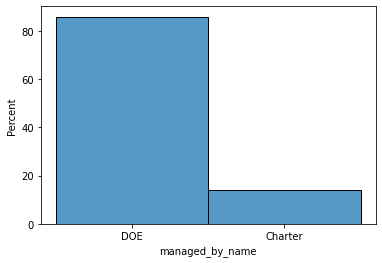

In [21]:
#charter school
sns.histplot(df_coJoin['managed_by_name'],stat='percent')

<AxesSubplot:xlabel='borough_code', ylabel='count'>

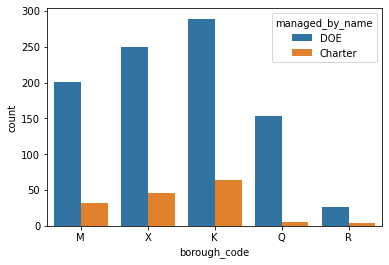

In [22]:
#borough charter
sns.countplot(data=df_coJoin, x="borough_code",hue="managed_by_name")

In [51]:
len(df_coJoin[(df_coJoin['borough_code']=='R') & (df_coJoin['managed_by_name']=='Charter')])

4

In [59]:
df_coDetails[df_coDetails['geographical_district_code'] == 0]

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,location_name,geographical_district_code,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code
1137,75Q256,75,P.S. Q256,Q043,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1138,75Q256,75,P.S. Q256,Q114,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1139,75Q256,75,P.S. Q256,Q198,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1140,75Q256,75,P.S. Q256,Q253,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1141,75Q256,75,P.S. Q256,Q410,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1142,75Q256,75,P.S. Q256,Q816,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1143,75Q256,75,P.S. Q256,QBHF,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q
1144,75Q256,75,P.S. Q256,Q438,False,534,221,105,208,0.069,...,P.S. Q256,0.0,DOE,K-12 all grades,"PK,0K,01,02,03,04,05,06,07,08,09,10,11,12,SE",NaN,NaN,Robert Lopez,1999-07-01T00:00:00.000,Q


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  Text(32, 0, '32.0')])

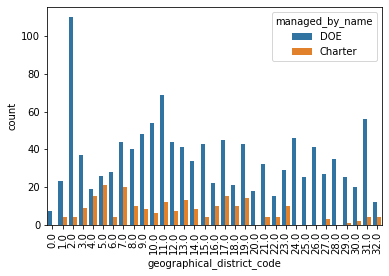

In [23]:
#school district / charter
sns.countplot(data=df_coDetails, x="geographical_district_code",hue="managed_by_name")
plt.xticks(rotation = 90)

In [24]:
#grades/charter
sns.countplot(data=df_coDetail, x="location_category_description",hue="managed_by_name")

NameError: name 'df_coDetail' is not defined

### group by building ID

<AxesSubplot:xlabel='building_id', ylabel='Count'>

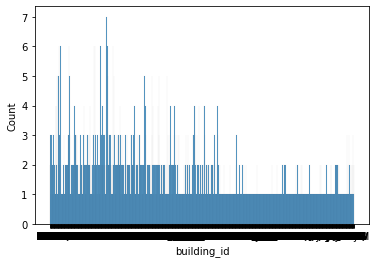

In [74]:
sns.histplot(data=df_coDetails, x="building_id")

In [26]:
#give count to building ID (amout of school in each building)
count = df_coDetails[['dbn','building_id']].groupby('building_id').count()
count = count.rename(columns={'dbn':'counts'})
count = count.reset_index()
count

,building_id,counts
0,K021,1
1,K026,1
2,K035,1
3,K054,1
4,K065,1
...,...,...
914,XAFI,2
915,XAGA,3
916,XBBZ,2
917,XBCA,1


In [27]:
# Keep all the ones as well
df_coDetails = df_coDetails.merge(count, how='left', on='building_id' )
df_coDetails

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,geographical_district_code,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts
0,01M015,1,P.S. 015 Roberto Clemente,M015,False,190,190,0,0,0.142,...,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01T00:00:00.000,M,2
1,01M063,1,The STAR Academy - P.S.63,M063,False,229,229,0,0,0.039,...,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01T00:00:00.000,M,2
2,01M064,1,P.S. 064 Robert Simon,M064,False,236,236,0,0,0.030,...,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01T00:00:00.000,M,3
3,01M142,1,P.S. 142 Amalia Castro,M142,False,329,329,0,0,0.012,...,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01T00:00:00.000,M,2
4,01M188,1,P.S. 188 The Island School,M188,False,398,238,160,0,0.028,...,1.0,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01T00:00:00.000,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,84X704,84,KIPP Academy Charter School,X151,False,1088,566,255,267,0.003,...,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000,X,4
1504,84X704,84,KIPP Academy Charter School,X790,False,1088,566,255,267,0.003,...,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000,X,1
1505,84X704,84,KIPP Academy Charter School,XAVN,False,1088,566,255,267,0.003,...,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000,X,5
1506,84X730,84,Bronx Charter School for the Arts,X972,False,523,310,213,0,0.002,...,8.0,Charter,Elementary,"0K,01,02,03,04,05,06,07",-73.886477,40.821815,Jonea Thomas,2003-07-01T00:00:00.000,X,2


<AxesSubplot:xlabel='counts', ylabel='%_poverty'>

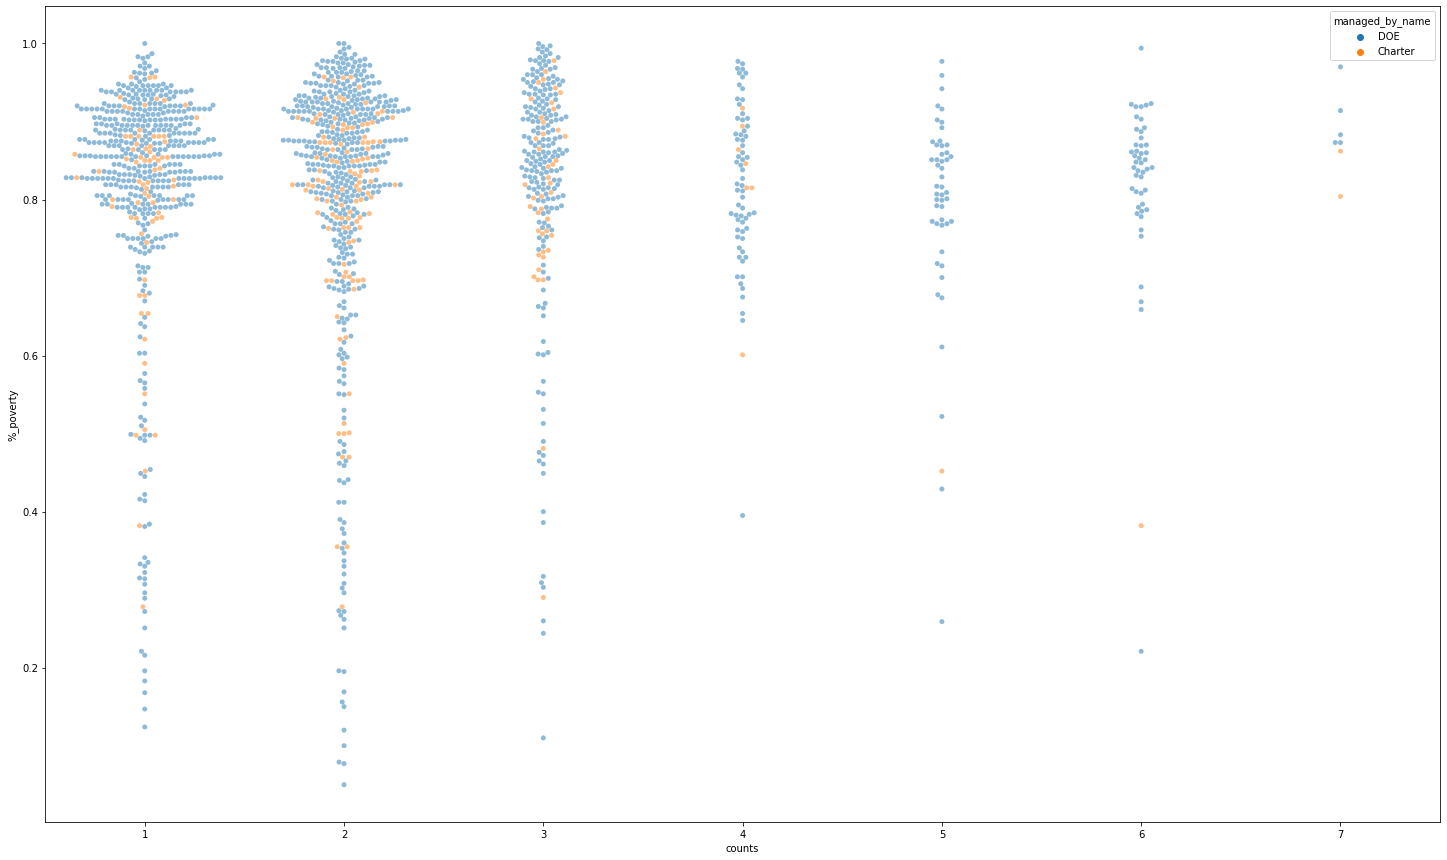

In [85]:
rcParams['figure.figsize'] = 25,15
sns.swarmplot(x='counts',y='%_poverty', hue='managed_by_name', data=df_coDetails, alpha = 0.5)

/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/si

<AxesSubplot:xlabel='geographical_district_code', ylabel='%_poverty'>

/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/movingpd/lib/python3.10/si

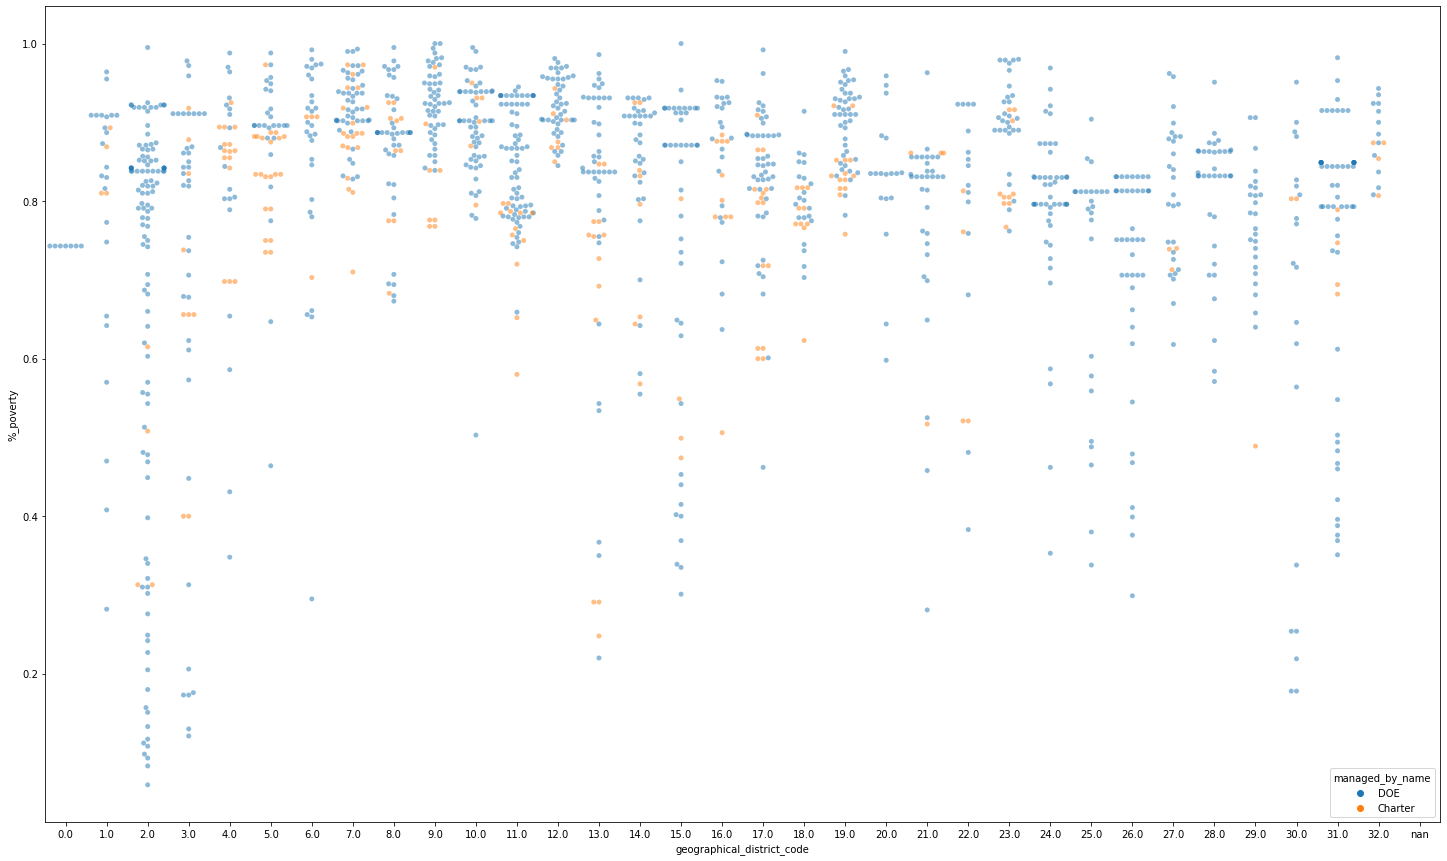

In [28]:
#NOPE
rcParams['figure.figsize'] = 25,15
sns.swarmplot(x='geographical_district_code',y='%_poverty', hue='managed_by_name', data=df_coDetails, alpha = 0.5)

In [29]:
#get open year
df_coDetails.open_date = pd.to_datetime(df_coDetails.open_date,
               format='%Y-%m-%dT%H:%M:%S')
df_coDetails['open_date']

0      1904-07-01
1      1905-07-01
2      1954-07-01
3      1976-07-01
4      1904-07-01
          ...    
1503   2000-05-04
1504   2000-05-04
1505   2000-05-04
1506   2003-07-01
1507   2003-07-01
Name: open_date, Length: 1508, dtype: datetime64[ns]

In [30]:
df_coDetails['opend_year'] = df_coDetails['open_date'].dt.year
df_coDetails['opend_year']

0       1904.0
1       1905.0
2       1954.0
3       1976.0
4       1904.0
         ...  
1503    2000.0
1504    2000.0
1505    2000.0
1506    2003.0
1507    2003.0
Name: opend_year, Length: 1508, dtype: float64

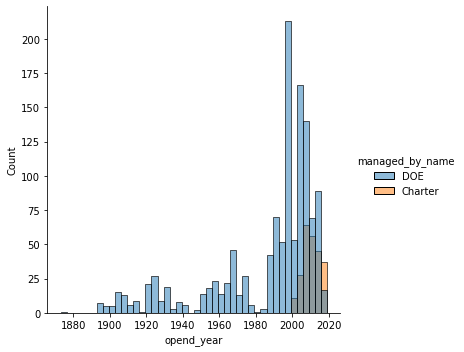

In [64]:
sns.displot(data=df_coDetails, x="opend_year",hue="managed_by_name")

In [73]:
df_coDetails[df_coDetails['building_id'] == 'X475']

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
341,10X213,10,Bronx Engineering and Technology Academy,X475,False,371,0,0,371,0.049,...,DOE,High school,"09,10,11,12,SE",-73.912686,40.877379,Vijayal Montgomery-Giles,2004-09-08,X,7,2004.0
349,10X284,10,Bronx School of Law and Finance,X475,False,354,0,0,354,0.006,...,DOE,High school,"09,10,11,12,SE",-73.912686,40.877379,Jessica Goring,2004-09-08,X,7,2004.0
364,10X397,10,English Language Learners and International Su...,X475,True,270,0,0,270,0.059,...,DOE,High school,"09,10,11,12",-73.912686,40.877379,NORMA VEGA,2008-07-01,X,7,2008.0
373,10X477,10,Marble Hill High School for International Studies,X475,False,444,0,0,444,0.140,...,DOE,High school,"09,10,11,12,SE",-73.912686,40.877379,KIRSTEN LARSON,2002-09-02,X,7,2002.0
375,10X546,10,Bronx Theatre High School,X475,False,314,0,0,314,0.010,...,DOE,High school,"09,10,11,12,SE",-73.912686,40.877379,Daniel Albetta,2003-07-01,X,7,2003.0
1574,84X539,84,New Visions Charter High School for Advanced M...,X475,False,505,0,0,505,0.026,...,Charter,High school,"09,10,11,12,SE",-73.912686,40.877379,Robert Hiller,2011-07-01,X,7,2011.0
1575,84X553,84,New Visions Charter High School for the Humani...,X475,False,574,0,0,574,0.010,...,Charter,High school,"09,10,11,12,SE",-73.912686,40.877379,Magaly I Hicks,2011-07-01,X,7,2011.0


In [68]:
df_ditrict5 = df_coDetails[df_coDetails['geographical_district_code'] == 5]
df_ditrict5

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
162,05M030,5,P.S. 030 Hernandez/Hughes,M030,False,205,205,0,0,0.029,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.935461,40.805653,LEONNA AUSTIN,1969-07-01,M,3,1969.0
163,05M092,5,P.S. 092 Mary McLeod Bethune,M092,False,214,214,0,0,0.005,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.945838,40.814917,ROSA DAVILA,1966-07-01,M,3,1966.0
164,05M123,5,P.S. 123 Mahalia Jackson,M123,False,418,255,163,0,0.022,...,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.944551,40.820216,Melitina Hernandez,1959-07-01,M,2,1959.0
165,05M125,5,P.S. 125 Ralph Bunche,M125,False,294,294,0,0,0.051,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.955722,40.810793,Reginald Higgins,1925-07-01,M,3,1925.0
166,05M129,5,P.S. 129 John H. Finley,M129,False,306,222,84,0,0.020,...,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.952020,40.814914,ODELPHIA PIERRE,1958-07-01,M,2,1958.0
167,05M148,5,Eagle Academy for Young Men of Harlem,M136,False,325,0,123,202,0.006,...,DOE,Secondary School,"06,07,08,09,10,11,12,SE",-73.947151,40.817228,Mahaliel H. Bethea II,2013-07-01,M,2,2013.0
168,05M154,5,P.S. 154 Harriet Tubman,M154,False,219,219,0,0,0.046,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.948902,40.810499,ELIZABETH JARRETT,1964-07-01,M,2,1964.0
169,05M157,5,The Urban Assembly School for Global Commerce,M501,False,195,0,0,195,0.005,...,DOE,High school,"09,10,11,12,SE",-73.938714,40.807019,ROONY VIZCAINO,2013-07-01,M,1,2013.0
170,05M175,5,P.S. 175 Henry H Garnet,M175,False,321,321,0,0,0.050,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.942706,40.814388,Kavita Pereira,1958-07-01,M,1,1958.0
171,05M194,5,P.S. 194 Countee Cullen,M194,False,169,169,0,0,0.000,...,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.941111,40.821208,KERIANNE HARRISON,1940-07-01,M,2,1940.0


In [31]:
df_coDetails.to_csv('colocation_details.csv')  

In [38]:
df_coJoin.to_csv('colocation_notExplode.csv')

In [37]:
list(df_coJoin.columns)

['dbn',
 'district',
 'school_name',
 'is_org_split-sited',
 'building_id',
 'transfer_school',
 'total_enrollment',
 'grades_3k-pk-5_enrollment',
 'grades_6-8_enrollment',
 'grades_9-12_enrollment',
 '%_asian',
 '%_black',
 '%_hispanic',
 '%_multiple_race_categories_not_represented',
 '%_white',
 '%_swd',
 '%_ell',
 '%_poverty',
 '2018-19_ela_#_tested',
 '2018-19_ela_#_proficient_(l3&4)',
 '2018-19_ela_%_proficient_(l3&4)',
 '2018-19_math_#_tested',
 '2018-19_math_#_proficient_(l3&4)',
 '2018-19_math_%_proficient_(l3&4)',
 '2018-19_total_4-year_august_grad_cohort',
 '2018-19_%_4-year_august_graduates',
 '2018-19_total_6-year_grad_cohort',
 '2018-19_%_6-year_graduates',
 'is_split',
 'location_code',
 'location_name',
 'geographical_district_code',
 'managed_by_name',
 'location_category_description',
 'grades_text',
 'longitude',
 'latitude',
 'principal_name',
 'open_date',
 'borough_code']

In [33]:
#summarize statistics
df_coJoin[["%_swd", "%_ell","%_poverty"]].describe()

,%_swd,%_ell,%_poverty
count,1079.000000,1079.000000,1079.000000
mean,0.253314,0.131990,0.791773
std,0.180577,0.150426,0.178687
min,0.000000,0.000000,0.056000
25%,0.173000,0.041000,0.751500
50%,0.219000,0.089000,0.842000
75%,0.270000,0.163000,0.908000
max,1.000000,1.000000,1.000000


In [40]:
df_coDetails[["%_swd", "%_ell","%_poverty"]].groupby("managed_by_name").describe()


KeyError: 'managed_by_name'

In [32]:
df_coDetails[df_coDetails['opend_year'] == 2015]

,dbn,district,school_name,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,grades_9-12_enrollment,%_asian,...,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code,counts,opend_year
389,11X481,11,The STEAM Bridge School,X311,False,267,267,0,0,0.116,...,DOE,Elementary,"0K,01,02,03,04,SE",-73.865498,40.843531,Katiria Rojas,2015-07-01,X,2,2015.0
390,11X483,11,The Matilda Avenue School,X314,False,213,213,0,0,0.042,...,DOE,Elementary,"0K,01,02,03,04,SE",-73.854402,40.901436,MARIA CIOFFI,2015-07-01,X,1,2015.0
520,15K839,15,M.S. 839,K437,False,364,0,364,0,0.118,...,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.973363,40.647598,MICHAEL PERLBERG,2015-07-01,K,1,2015.0
823,28Q349,28,The Queens School for Leadership and Excellence,Q314,False,520,520,0,0,0.431,...,DOE,Elementary,"PK,0K,01,02,03,04,SE",-73.797981,40.708698,TANYA BATES HOWELL,2015-07-01,Q,2,2015.0
825,28Q358,28,M.S. 358,Q314,False,362,0,362,0,0.265,...,DOE,Junior High-Intermediate-Middle,"06,07,08,SE",-73.797981,40.708698,BRENDAN MIMS,2015-07-01,Q,2,2015.0
1437,84Q320,84,New Visions Charter High School for Advanced M...,Q400,False,488,0,0,488,0.061,...,Charter,High school,"09,10,11,12,SE",-73.782684,40.673949,SHARON JOHN,2015-07-01,Q,3,2015.0
1441,84R012,84,New Ventures Charter School,RAHR,False,146,0,0,146,0.014,...,Charter,High school,"09,10,11,12,SE",-74.178183,40.607104,Ryan Melis,2015-07-01,R,3,2015.0
1473,84X484,84,Bronx Charter School for Better Learning II,X144,False,375,375,0,0,0.016,...,Charter,Elementary,"0K,01,02,03,04",-73.836525,40.863842,Kevin Brennan/Anne Clarke-Raysor,2015-07-01,X,3,2015.0
1478,84X489,84,South Bronx Classical Charter School III,XBBZ,False,323,323,0,0,0.019,...,Charter,Elementary,"0K,01,02,03,04,05",-73.906403,40.829793,Rebecca Geary,2015-07-01,X,2,2015.0


## Map data prep for the interactive website

In [47]:
df_mapData = pd.read_csv('map_dashboard_raw.csv')

In [48]:
df_mapData.dtypes

dbn                                              object
0chool_di0t                                       int64
managed_by_name                                  object
total_enrollment                                  int64
grade0_3k-pk-5_enrollment                         int64
grade0_6-8_enrollment                             int64
grade0_9-12_enrollment                            int64
pct_a0ian                                       float64
pct_black                                       float64
pct_hi0panic                                    float64
pct_multiple_race_categorie0_not_repre0ented    float64
pct_white                                       float64
pct_0wd                                         float64
pct_ell                                         float64
pct_poverty                                     float64
Level3_4_ELA_proficient                         float64
Level3_4_Math_proficient                        float64
Pct_4_year_august_graduate                      

In [52]:
df_mapData[["Level3_4_ELA_proficient", "Level3_4_Math_proficient","Pct_4_year_august_graduate","Pct_6_year_graduates"]] = df_mapData[["Level3_4_ELA_proficient", "Level3_4_Math_proficient","Pct_4_year_august_graduate","Pct_6_year_graduates"]].apply(pd.to_numeric)

In [54]:
df_mapData

,dbn,0chool_di0t,managed_by_name,total_enrollment,grade0_3k-pk-5_enrollment,grade0_6-8_enrollment,grade0_9-12_enrollment,pct_a0ian,pct_black,pct_hi0panic,pct_multiple_race_categorie0_not_repre0ented,pct_white,pct_0wd,pct_ell,pct_poverty,Level3_4_ELA_proficient,Level3_4_Math_proficient,Pct_4_year_august_graduate,Pct_6_year_graduates
0,01M015,1,DOE,190,190,0,0,0.142,0.295,0.505,0.011,0.047,0.232,0.089,0.816,0.60,0.66,0.00,0.00
1,01M063,1,DOE,229,229,0,0,0.039,0.170,0.686,0.031,0.074,0.301,0.022,0.773,0.44,0.32,0.00,0.00
2,01M064,1,DOE,236,236,0,0,0.030,0.169,0.737,0.021,0.042,0.267,0.017,0.907,0.49,0.43,0.00,0.00
3,01M142,1,DOE,329,329,0,0,0.012,0.164,0.769,0.030,0.024,0.331,0.067,0.964,0.42,0.38,0.00,0.00
4,01M188,1,DOE,398,238,160,0,0.028,0.314,0.628,0.008,0.023,0.339,0.098,0.955,0.25,0.32,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,84X704,7,Charter,1088,566,255,267,0.003,0.416,0.565,0.009,0.006,0.155,0.087,0.886,0.62,0.78,0.95,0.99
1504,84X704,7,Charter,1088,566,255,267,0.003,0.416,0.565,0.009,0.006,0.155,0.087,0.886,0.62,0.78,0.95,0.99
1505,84X704,7,Charter,1088,566,255,267,0.003,0.416,0.565,0.009,0.006,0.155,0.087,0.886,0.62,0.78,0.95,0.99
1506,84X730,8,Charter,523,310,213,0,0.002,0.250,0.723,0.015,0.010,0.220,0.132,0.864,0.35,0.43,0.00,0.00


In [56]:
mapdataMean = df_mapData.groupby(['0chool_di0t','managed_by_name'])[["Level3_4_ELA_proficient", "Level3_4_Math_proficient","Pct_4_year_august_graduate","Pct_6_year_graduates"]].mean()

In [57]:
mapdataMean

Level3_4_ELA_proficient  \
0chool_di0t managed_by_name                            
0           0                               0.000000   
            DOE                             0.050000   
1           0                               0.000000   
            Charter                         0.555000   
            DOE                             0.254783   
...                                              ...   
31          0                               0.000000   
            Charter                         0.120000   
            DOE                             0.208571   
32          Charter                         0.525000   
            DOE                             0.180833   

                             Level3_4_Math_proficient  \
0chool_di0t managed_by_name                             
0           0                                0.000000   
            DOE                              0.090000   
1           0                                0.000000   
            Charter                          0.500000   
            DOE                              0.234348   
...                                               ...   
31          0                                0.000000   
            Charter                          0.052500   
            DOE                              0.211607   
32          Charter                          0.657500   
            DOE                              0.135833   

                             Pct_4_year_august_graduate  Pct_6_year_graduates  
0chool_di0t managed_by_name                                                    
0           0                                  0.000000              0.000000  
            DOE                                0.000000              0.000000  
1           0                                  0.000000              0.000000  
            Charter                            0.000000              0.000000  
            DOE                                0.161304              0.169130  
...                                                 ...                   ...  
31          0                                  0.000000              0.000000  
            Charter                            0.325000              0.417500  
            DOE                                0.095714              0.097321  
32          Charter                            0.232500              0.735000  
            DOE                                0.281667              0.315833  

[79 rows x 4 columns]

In [14]:
mapdataSum = df_mapData.groupby(['school_dist','managed_by_name'])[['total_enrollment','grades_3k-pk-5_enrollment','grades_6-8_enrollment','grades_9-12_enrollment']].sum()

In [18]:
mapdataCount = df_mapData.groupby(['school_dist','managed_by_name']).count()

In [58]:
mapdataMean.to_csv('mapdataMean2.csv') 
# mapdataSum.to_csv('mapdataSum.csv') 

In [19]:
mapdataCount.to_csv('mapdataCount.csv') 

In [27]:
all_count = df_loc.groupby(['Geographical_District_code']).count()

In [28]:
co_count = df_mapData.groupby(['school_dist']).count()

In [32]:
co_count['dbn']/all_count['system_code']


school_dist
0.0     25.500000
1.0      0.682927
2.0      0.811688
3.0      0.730159
4.0      0.692308
5.0      0.800000
6.0      0.523810
7.0      0.755814
8.0      0.645570
9.0      0.554455
10.0     0.508475
11.0     0.846939
12.0     0.662338
13.0     0.771429
14.0     0.671875
15.0     0.661972
16.0     0.750000
17.0     0.772152
18.0     0.603774
19.0     0.760000
20.0     0.400000
21.0     0.666667
22.0     0.372549
23.0     0.735849
24.0     0.984615
25.0     0.520000
26.0     1.000000
27.0     0.388235
28.0     0.627119
29.0     0.481481
30.0     0.365079
31.0     0.809524
32.0     0.444444
dtype: float64

In [76]:
df_colocation = pd.read_csv('colocation_notExplode.csv')
df_allSchool = pd.read_csv('2019_-_2020_School_Locations.csv')

In [78]:
df_colocation

,Unnamed: 0,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,...,location_name,geographical_district_code,managed_by_name,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code
0,0,01M015,1,P.S. 015 Roberto Clemente,False,M015,False,190,190,0,...,P.S. 015 Roberto Clemente,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.978747,40.722075,IRENE SANCHEZ,1904-07-01T00:00:00.000,M
1,1,01M063,1,The STAR Academy - P.S.63,False,M063,False,229,229,0,...,The STAR Academy - P.S.63,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.986214,40.724440,DARLENE CAMERON,1905-07-01T00:00:00.000,M
2,2,01M064,1,P.S. 064 Robert Simon,False,M064,False,236,236,0,...,P.S. 064 Robert Simon,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.981597,40.723130,Marlon L. Hosang,1954-07-01T00:00:00.000,M
3,3,01M142,1,P.S. 142 Amalia Castro,False,M142,False,329,329,0,...,P.S. 142 Amalia Castro,1.0,DOE,Elementary,"PK,0K,01,02,03,04,05,SE",-73.984116,40.718121,DAPHNA GUTMAN,1976-07-01T00:00:00.000,M
4,4,01M188,1,P.S. 188 The Island School,False,M188,False,398,238,160,...,P.S. 188 The Island School,1.0,DOE,K-8,"PK,0K,01,02,03,04,05,06,07,08,SE",-73.977380,40.719888,Suany Ramos,1904-07-01T00:00:00.000,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1074,84X616,84,KIPP Elements Primary Charter School,False,X859,False,181,181,0,...,KIPP Elements Primary Charter School,10.0,Charter,Elementary,"0K,01",-73.903764,40.857932,Sarah English/Diamond Graham,2019-07-01T00:00:00.000,X
1075,1075,84X617,84,KIPP All Charter School,False,X859,False,179,89,90,...,KIPP All Charter School,10.0,Charter,K-8,"05,06",-73.903764,40.857932,Kate Baughman,2019-07-01T00:00:00.000,X
1076,1076,84X623,84,Neighborhood Charter School: Bronx,False,XBPP,False,107,107,0,...,Neighborhood Charter School: Bronx,7.0,Charter,Elementary,"0K,01",-73.909019,40.808963,NaN,2019-07-01T00:00:00.000,X
1077,1077,84X704,84,KIPP Academy Charter School,True,"X151, X790, XAVN",False,1088,566,255,...,KIPP Academy Charter School,7.0,Charter,K-12 all grades,"0K,01,02,03,04,05,06,07,08,09,10,11,12",-73.921140,40.822574,Frank Corcoran/Tyritia Groves,2000-05-04T00:00:00.000,X


In [81]:
df_colocation.groupby(['managed_by_name']).count()

,Unnamed: 0,dbn,district,school_name,is_org_split-sited,building_id,transfer_school,total_enrollment,grades_3k-pk-5_enrollment,grades_6-8_enrollment,...,location_code,location_name,geographical_district_code,location_category_description,grades_text,longitude,latitude,principal_name,open_date,borough_code
managed_by_name,,,,,,,,,,,,,,,,,,,,,
Charter,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,142,151,151
DOE,918,918,918,918,918,918,918,918,918,918,...,918,918,918,918,918,917,917,912,918,918


In [70]:
df_allSchool['borough_code'] = df_allSchool['system_code'].astype(str).str[2]
df_allSchool['borough_code']

0       K
1       K
2       K
3       K
4       K
       ..
2185    X
2186    X
2187    X
2188    X
2189    X
Name: borough_code, Length: 2190, dtype: object

In [74]:
df_allSchool.groupby(['Managed_by_name']).count()

,fiscal_year,system_code,location_code,location_name,BEDS,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,open_date,...,community_school_sup_name,Tier_3_Support_Location_Name,Tier_3_Support_Leader_Name,Tier_2_Support_Location_Name,HighSchool_Network_Location_Code,HighSchool_Network_Name,HighSchool_Network_Superintendent,Community_district 1,Police_precinct,borough_code
Managed_by_name,,,,,,,,,,,,,,,,,,,,,
Charter,283,283,283,283,283,283,283,281,246,283,...,0,0,0,0,0,0,0,282,278,283
DOE,1907,1907,1907,1907,1907,1907,1907,1822,1856,1907,...,1387,1636,1222,1636,500,500,500,1907,1903,1907
